In [122]:
#TASK 1
import torch as tt
import numpy

dt = tt.randint(-10, 41, (30,))
print("Random temperatures for 30 days: ")
print(dt.tolist())    
print("\n")

stations = ["Station A", "Station B", "Station C", "Station D", "Station E"]   

wd_c = tt.randint(-10, 41, (10, 5))
print("Weather Data for 5 stations in 10 days: \n", wd_c.numpy(),"\n")


mean = tt.mean(wd_c.float(), dim=0)  
max = tt.max(wd_c, dim=0).values
min = tt.min(wd_c, dim=0).values


print("The mean, max and min for each of the 5 stations: ")

for i in range(len(stations)):
    print(f"{stations[i]}: Mean = {mean[i]:.1f} C, Max = {max[i]} C, Min = {min[i]} C")

Random temperatures for 30 days: 
[30, -1, 25, -3, 18, 38, 11, 40, 22, 31, -7, 24, -8, 16, 20, 32, 2, 38, 32, 20, 29, 32, 14, 2, 33, 4, 36, 30, -6, 12]


Weather Data for 5 stations in 10 days: 
 [[ 32  37 -10  16  31]
 [  8  34  16  -6  -1]
 [ 36   6  21  -1  -4]
 [  4  35   2  22  -5]
 [ 10  40  -6  -9   7]
 [  2   1   1  21   5]
 [ 20  27  26  25   3]
 [  4  32   2  37  -2]
 [ 36  39  32  24   6]
 [  8  38   7  36  21]] 

The mean, max and min for each of the 5 stations: 
Station A: Mean = 16.0 C, Max = 36 C, Min = 2 C
Station B: Mean = 28.9 C, Max = 40 C, Min = 1 C
Station C: Mean = 9.1 C, Max = 32 C, Min = -10 C
Station D: Mean = 16.5 C, Max = 37 C, Min = -9 C
Station E: Mean = 6.1 C, Max = 31 C, Min = -5 C


In [118]:
#TASK 2
import torch as tt

stations = ["Station A", "Station B", "Station C", "Station D", "Station E"]  
wd_c = tt.randint(-10, 41, (10, 5))


wd_f = (wd_c*9)/5 + 32
print("After converting to fahrenheit:")
for i in range(10):
    print(f"Day {i+1}, Temperatures: {[f'{val:.2f}' for val in wd_f[i]]}")


print("\n")

max_daily_c = tt.max(wd_c, dim=1).values
min_daily_c = tt.min(wd_c, dim=1).values

range_daily_c = max_daily_c = min_daily_c

print(f"The daily range of temperatures from data from 5 stations: \n\nIn celcius:\n{range_daily_c.numpy()}\n\nIn farenheit:\n{((range_daily_c*9)/5 + 32).numpy()}\n\n")

avg_temp_c = tt.mean(wd_c.float())
print(f"Average temperature is: {avg_temp_c:.2f} C\n")

stddiv_c = tt.std(wd_c.float(), dim=0)
print("Temperature variability accross all stations:\n", stddiv_c.numpy(),"\n")

mvsi = tt.argmax(stddiv_c).item()
print(f"The station with highest variability is Station {stations[mvsi]}")

hottest_day = tt.argmax(wd_c) // wd_c.shape[1]
print(f"The hottest day is Day {hottest_day + 1}")


After converting to fahrenheit:
Day 1, Temperatures: ['37.40', '15.80', '91.40', '71.60', '23.00']
Day 2, Temperatures: ['26.60', '28.40', '104.00', '62.60', '75.20']
Day 3, Temperatures: ['66.20', '21.20', '21.20', '66.20', '48.20']
Day 4, Temperatures: ['96.80', '55.40', '42.80', '69.80', '96.80']
Day 5, Temperatures: ['39.20', '80.60', '32.00', '50.00', '48.20']
Day 6, Temperatures: ['68.00', '32.00', '84.20', '75.20', '75.20']
Day 7, Temperatures: ['42.80', '60.80', '71.60', '17.60', '78.80']
Day 8, Temperatures: ['100.40', '75.20', '95.00', '15.80', '75.20']
Day 9, Temperatures: ['77.00', '104.00', '64.40', '62.60', '50.00']
Day 10, Temperatures: ['33.80', '75.20', '50.00', '62.60', '30.20']


The daily range of temperatures from data from 5 stations: 

In celcius:
[-9 -3 -6  6  0  0 -8 -9 10 -1]

In farenheit:
[15.799999 26.6      21.2      42.8      32.       32.       17.6
 15.799999 50.       30.2     ]


Average temperature is: 14.98 C

Temperature variability accross all sta

In [113]:
#TASK 3

import torch as tt


stations = ["Station A", "Station B", "Station C", "Station D", "Station E"]  

wd_c = tt.randint(-10, 41, (30, 5))


bi = tt.nonzero(wd_c > 30, as_tuple=True)


print("Heat warnings when temperature exceeds 30 C:\n")
for i in range(len(bi[0])):
    day = bi[0][i]
    station = bi[1][i]
    temp = wd_c[day, station].item()
    print(f"Day {day.item()+1}: {stations[station.item()]} -> {temp} C")


rain_data_mm = tt.randint(0, 30, (30, 5), dtype=tt.float)

cf = tt.rand(5) * 0.2 + 0.9  


newrain_data_mm = (rain_data_mm * cf).round(decimals=2)

print("\nCalibrated Rainfall Data:")
for i in range(30):
    print(f"Day {i+1}, rainfall data : {newrain_data_mm[i].numpy()}")



Heat warnings when temperature exceeds 30 C:

Day 1: Station E -> 37 C
Day 3: Station D -> 38 C
Day 3: Station E -> 34 C
Day 4: Station A -> 35 C
Day 4: Station B -> 33 C
Day 4: Station E -> 36 C
Day 5: Station C -> 36 C
Day 8: Station E -> 33 C
Day 10: Station E -> 37 C
Day 12: Station B -> 34 C
Day 12: Station C -> 37 C
Day 13: Station E -> 39 C
Day 14: Station B -> 33 C
Day 15: Station B -> 35 C
Day 16: Station A -> 37 C
Day 17: Station A -> 37 C
Day 17: Station B -> 36 C
Day 18: Station A -> 39 C
Day 19: Station D -> 39 C
Day 20: Station C -> 36 C
Day 21: Station A -> 33 C
Day 21: Station C -> 35 C
Day 21: Station E -> 32 C
Day 22: Station D -> 34 C
Day 23: Station D -> 31 C
Day 23: Station E -> 36 C
Day 24: Station B -> 31 C
Day 24: Station C -> 33 C
Day 28: Station A -> 33 C
Day 29: Station B -> 36 C
Day 29: Station D -> 34 C
Day 30: Station A -> 39 C

Calibrated Rainfall Data:
Day 1, rainfall data : [10.65  8.19  7.53 20.99  1.09]
Day 2, rainfall data : [ 9.68 15.35 23.67  4.2  

Elevation: 251m, Temperature: 14.60 C
Elevation: 867m, Temperature: 21.80 C
Elevation: 639m, Temperature: 11.40 C
Elevation: 275m, Temperature: 17.00 C
Elevation: 98m, Temperature: 20.80 C
Elevation: 546m, Temperature: 26.80 C
Elevation: 677m, Temperature: 12.60 C
Elevation: 296m, Temperature: 16.40 C
Elevation: 795m, Temperature: 7.60 C
Elevation: 578m, Temperature: 11.80 C


The average weather quality index of each station is:
Station A : 21.94
Station B : 23.64
Station C : 22.75
Station D : 19.76
Station E : 23.46

The best station to live is (i.e. highest wqi): Station B


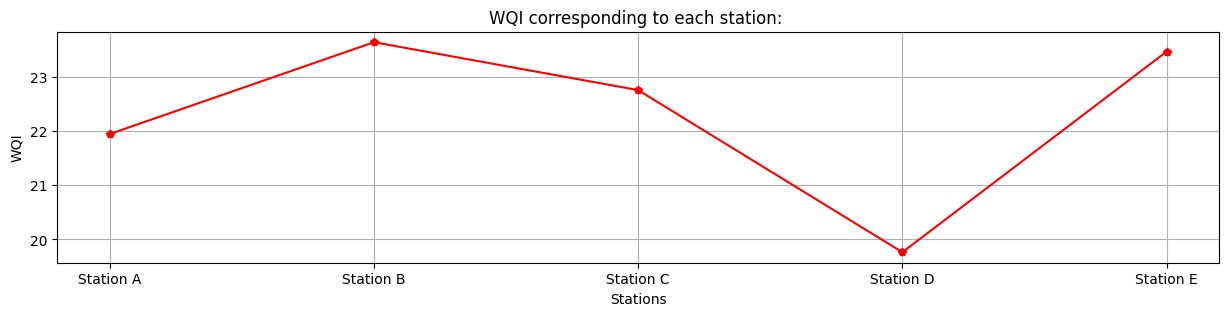

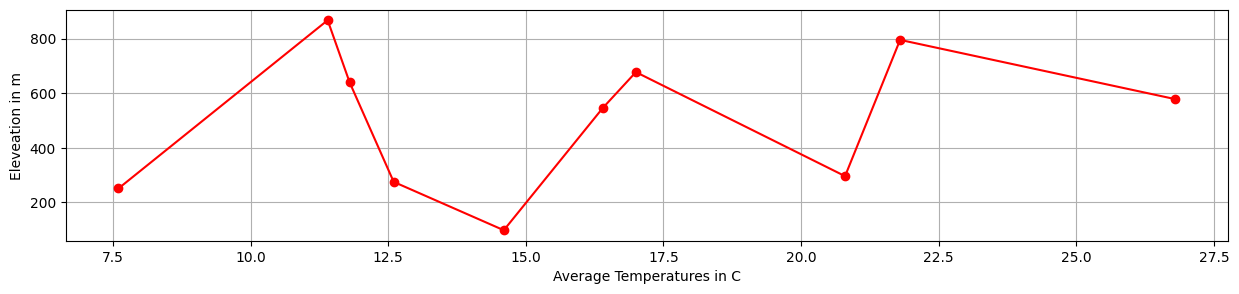

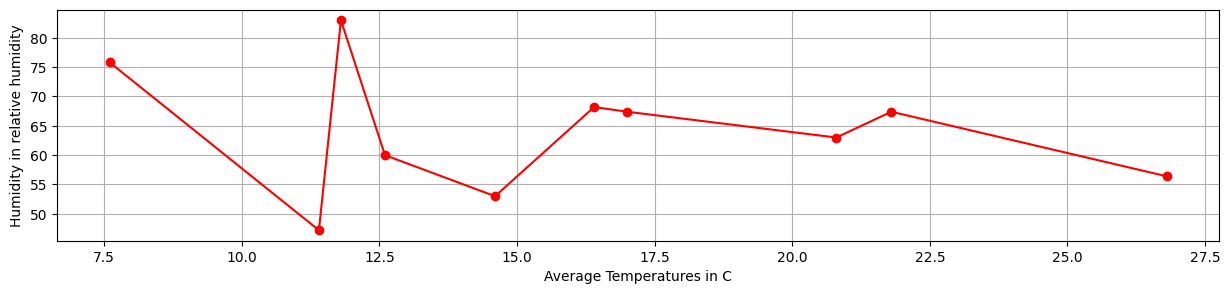

In [121]:
#TASK 4

import torch
import matplotlib.pyplot as plt
import seaborn as sns




stations = ["Station A", "Station B", "Station C", "Station D", "Station E"]


temp_c = torch.randint(-10, 41, (30, 5), dtype=torch.float) 
hum_rh = torch.randint(20, 100, (30, 5), dtype=torch.float)  
rf_mm = torch.randint(0, 30, (30, 5), dtype=torch.float) 

avgt_10 = temp_c[:10].mean(dim=1)
ele_m = torch.randint(50, 900, (10,))
for i in range(10):
    print(f"Elevation: {ele_m[i].item():}m, Temperature: {avgt_10[i].item():.2f} C")
print("\n")
wqi = ((0.5 * temp_c) + (0.3 * hum_rh) - (0.2 * rf_mm)).round(decimals = 2)

awqi = wqi.mean(dim = 0)
id = torch.argmax(awqi).item()

print("The average weather quality index of each station is:")
for i in range(5):
    print(f"{stations[i]} : {awqi[i].item():.2f}")

#I'm using wqi to find the best place to live

print(f"\nThe best station to live is (i.e. highest wqi): {stations[id]}")

#5 tensor operations:
#1) awqi = wqi.mean(dim = 0)    (Average wqi)
#2) id = torch.argmax(awqi).item()    (Finding maximum wqi)
#3) avg_hum = hum_rh[:10].mean(dim=1).numpy()    (Finding average humidity for first 10 days)
#4) avgt_10 = temp_c[:10].mean(dim=0)     (Finding everage temperature for first 10 days per station)
#5) avgt_10_2 = temp_c[:10].mean(dim = 1)   (Finding average temperature for first 10 days for each day)

#Now I'll use these above tensors to plot 3 graphs :)

#GRAPH 1 : WQI vs Station

plt.figure(figsize=(15, 3))
plt.plot([f"{stations[i]}" for i in range(5)], awqi.numpy(), marker='p', color='r')

plt.xlabel("Stations")
plt.ylabel("WQI")
plt.title("WQI corresponding to each station: ")

plt.grid(True)
plt.show()


#GRAPH 2 :  Temperature vs Elevation

si = avgt_10.numpy().argsort()
temp_new = avgt_10.numpy()[si]
plt.figure(figsize = (15,3))
plt.plot(temp_new, ele_m.numpy(), marker = 'o',  color = 'r')
plt.xlabel("Average Temperatures in C")
plt.ylabel("Eleveation in m")

plt.grid(True)
plt.show()


#GRAPH 3 : Humidity vs temperature for first 10 days

avg_hum = hum_rh[:10].mean(dim=1).numpy()
avgt_10_2 = temp_c[:10].mean(dim = 1)
si = avgt_10_2.numpy().argsort()
temp_new = avgt_10_2.numpy()[si]
plt.figure(figsize = (15,3))
plt.plot(temp_new, avg_hum, marker = 'o', color = 'r')
plt.xlabel("Average Temperatures in C")
plt.ylabel("Humidity in relative humidity")

plt.grid(True)
plt.show()